In [31]:
import cv2
import torch
import matplotlib.pyplot as plt

In [32]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Using device:", device)

Using device: cuda


In [34]:
model_type = "DPT_Large"  # Options: "MiDaS_small", "MiDaS_large", "DPT_Large", "DPT_Hybrid"

midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in /home/gkmo/.cache/torch/hub/intel-isl_MiDaS_master


In [35]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")


Using cache found in /home/gkmo/.cache/torch/hub/intel-isl_MiDaS_master


In [42]:
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_featur

In [44]:
device

device(type='cuda')

In [45]:
if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

In [46]:
image_dir = "/home/gkmo/workspace/data/final/new_splits/test/images"

In [47]:
from pathlib import Path
from PIL import Image
import numpy as np
image_path = Path(image_dir)

In [48]:
idx = 27

In [49]:
image_files = sorted([p for p in image_path.glob('*') if p.suffix in ['.jpg', '.jpeg', '.png']])
output_dir = Path("/home/gkmo/workspace/data/final/midas_dpt_large/test")

In [50]:
with torch.no_grad():
    for i in image_files:
        print(f"Done image: {i.name}")
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        input_batch = transform(img).to(device)
        prediction = midas(input_batch)
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

        array = prediction.cpu().numpy()
        normalized = (array - array.min()) / (array.max() - array.min())
        norm_array = (normalized * 255).astype(np.uint8)
        output_filename = output_dir / f"{i.name}"
        img = Image.fromarray(norm_array).convert("L")
        #print(f"Max {norm_array.max()}, Min {norm_array.min()}")
        img.save(output_filename)

Done image: 000005.png
Done image: 000025.png
Done image: 000051.png
Done image: 000060.png
Done image: 000067.png
Done image: 000073.png
Done image: 000082.png
Done image: 000102.png
Done image: 000109.png
Done image: 000113.png
Done image: 000129.png
Done image: 000130.png
Done image: 000131.png
Done image: 000138.png
Done image: 000151.png
Done image: 000170.png
Done image: 000172.png
Done image: 000197.png
Done image: 000215.png
Done image: 000223.png
Done image: 000226.png
Done image: 000231.png
Done image: 000286.png
Done image: 000288.png
Done image: 000292.png
Done image: 000293.png
Done image: 000315.png
Done image: 000340.png
Done image: 000345.png
Done image: 000351.png
Done image: 000370.png
Done image: 000374.png
Done image: 000388.png
Done image: 000390.png
Done image: 000391.png
Done image: 000403.png
Done image: 000410.png
Done image: 000418.png
Done image: 000420.png
Done image: 000429.png
Done image: 000444.png
Done image: 000445.png
Done image: 000449.png
Done image:

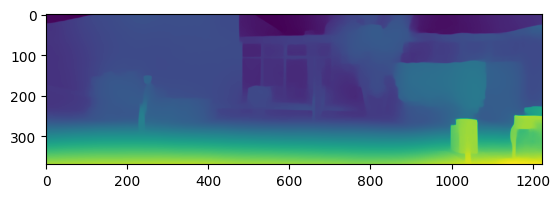

In [51]:
plt.imshow(array)

In [57]:
with torch.no_grad():
    prediction = midas(input_batch)

In [58]:
prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

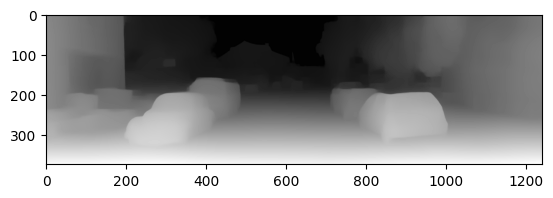

In [59]:
plt.imshow(output, cmap="gray")

In [1]:
!wget http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat

--2025-06-17 10:27:28--  http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat
Resolving horatio.cs.nyu.edu (horatio.cs.nyu.edu)... 216.165.22.17
Connecting to horatio.cs.nyu.edu (horatio.cs.nyu.edu)|216.165.22.17|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat [following]
--2025-06-17 10:27:28--  https://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat
Connecting to horatio.cs.nyu.edu (horatio.cs.nyu.edu)|216.165.22.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2972037809 (2.8G)
Saving to: ‘nyu_depth_v2_labeled.mat’

nyu_depth_v2_labele   6%[>                   ] 195.28M  19.6MB/s    eta 2m 34s ^C
